In [1]:
import matplotlib.pyplot as plt
from PIL import Image as imm
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
import mtcnn
import pickle

from scipy.spatial import distance
from tensorflow.keras.models import load_model
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

with open('face_svc.pkl', 'rb') as file_1:
  model_svc = pickle.load(file_1)

with open('face_svc_ikh_toni.pkl', 'rb') as file_2:
  model_svc2 = pickle.load(file_2)

with open('face_svc_ikh_toni_facemesh.pkl', 'rb') as file_22:
  model_svc3 = pickle.load(file_22)  

# with open('face_logreg_ikh_toni.pkl', 'rb') as file_3:
#   model_logreg = pickle.load(file_3)

# with open('face_knn_ikh_toni.pkl', 'rb') as file_4:
#   model_knn = pickle.load(file_4)

# with open('face_gnb_ikh_toni.pkl', 'rb') as file_5:
#   model_gnb = pickle.load(file_5)

model_facenet = load_model('facenet_model/facenet_keras.h5')

detector = mtcnn.MTCNN()
def detect_face(path_image,size=(160,160)):
    get_array = cv2.imread(path_image)
    get_array = cv2.cvtColor(get_array, cv2.COLOR_BGR2RGB)
    get_face = detector.detect_faces(get_array)
    if len(get_face) > 0:
        x1, y1, width, height = get_face[0]['box']
        x2, y2 = x1 + width, y1+ height
        face_array = get_array[y1:y2,x1:x2]
        image = imm.fromarray(face_array).resize(size)
        face_array_final = np.asarray(image)
        return face_array_final
    else: pass

def detect_face2(path_image,size=(160,160)):
    get_array = cv2.imread(path_image)
    width = 450
    height = 450
    dim = (width, height)
    resized = cv2.resize(get_array, dim, interpolation = cv2.INTER_AREA)
    get_array = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    get_face = detector.detect_faces(get_array)
    if len(get_face) > 0:
        x1, y1, width, height = get_face[0]['box']
        x2, y2 = x1 + width, y1+ height
        face_array = get_array[y1:y2,x1:x2]
        image = imm.fromarray(face_array).resize(size)
        face_array_final = np.asarray(image)
        return get_array,x1,y1,x2,y2
    else: pass

def detect_face_cam(image,size=(160,160)):
    get_face = detector.detect_faces(image)
    if len(get_face) > 0:
        x1, y1, width, height = get_face[0]['box']
        x2, y2 = x1 + width, y1+ height
        face_array = image[y1:y2,x1:x2]
        image = imm.fromarray(face_array).resize(size)
        face_array_final = np.asarray(image)
        return face_array_final,x1,y1,x2,y2
    else: pass

def prepare_to_predict(image_path,model):
    array = detect_face(image_path)/255
    image_ori,x1,y1,x2,y2 = detect_face2(image_path)
    image = cv2.rectangle(image_ori,(x1,y1),(x2,y2),(255,0,0),8)
    get_array = np.expand_dims(array,axis=0)
    embed = model_facenet.predict(get_array)
    embed_scaled = Normalizer(norm='l2').transform(embed)
    preds = model.predict(embed_scaled)
    preds_proba = np.max(model.predict_proba(embed_scaled))
    image = cv2.putText(image, preds[0], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
    plt.imshow(image)
    plt.axis('off')
    return preds[0],preds_proba

def prepare_to_predict_cam(image,model):
    array = image
    try:
        image_ori,x1,y1,x2,y2 = detect_face_cam(image)
        image = cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),8)
        get_array = np.expand_dims(image_ori/255,axis=0)
        embed = model_facenet.predict(get_array)
        embed_scaled = Normalizer(norm='l2').transform(embed)
        preds = model.predict(embed_scaled)
        preds_proba = round(np.max(model.predict_proba(embed_scaled)),2)
        image = cv2.putText(image, preds[0] + ' ' +str(preds_proba), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
        # plt.imshow(image)
        # plt.axis('off')
        return preds[0],preds_proba,image
    except TypeError: return array


#prepare_to_predict('image_test/tom_hanks.jpg',model_svc)

c:\Users\ikhbar\anaconda3\envs\face_recog\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


('Kate Winslet', 0.8988131007209804)

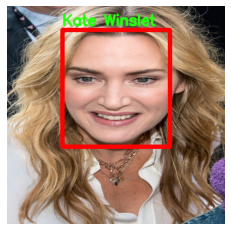

In [2]:
prepare_to_predict('image_test/kate_winslet.jpg',model_svc)

('Tom Hanks', 0.9023859410017655)

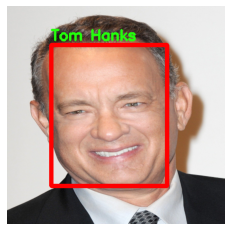

In [7]:
prepare_to_predict('image_test/tom_hanks.jpg',model_svc)

('toni', 0.6098304487506788)

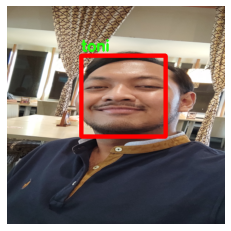

In [2]:
prepare_to_predict(r'data_image\toni\1672370700606.jpg',model_svc2)

In [2]:
mean_ikh = np.load('mean_ikh.npy')
mean_toni = np.load('mean_toni.npy')

In [4]:
ikh_2 = detect_face('image_test\ikhhh.jpg')/255
ikh_2ready = model_facenet.predict(np.expand_dims(ikh_2,axis=0))
ikh_2ready = Normalizer(norm='l2').transform(ikh_2ready).reshape(-1,)

In [5]:
from scipy.spatial.distance import euclidean
# print(euclidean(ikh_ready,mean_ikh))
# print(euclidean(ikh_ready,mean_toni))

print(euclidean(ikh_2ready,mean_ikh))
print(euclidean(ikh_2ready,mean_toni))

0.5756796598434448
1.0799371004104614


# CAM test with SVC

In [2]:
from playsound import playsound
import os

In [3]:
def detect_face_cam(image,size=(160,160)):
    get_face = detector.detect_faces(image)
    if len(get_face) > 0:
        x1, y1, width, height = get_face[0]['box']
        x2, y2 = x1 + width, y1+ height
        face_array = image[y1:y2,x1:x2]
        image = imm.fromarray(face_array).resize(size)
        face_array_final = np.asarray(image)
        return face_array_final,x1,y1,x2,y2
    else: pass

def prepare_to_predict_cam(image,model):
    array = image
    image_ori,x1,y1,x2,y2 = detect_face_cam(image)
    get_array = np.expand_dims(image_ori/255,axis=0)
    embed = model_facenet.predict(get_array)
    embed_scaled = Normalizer(norm='l2').transform(embed)
    preds = model.predict(embed_scaled)
    preds_proba = round(np.max(model.predict_proba(embed_scaled)),2)
    if preds_proba > 0.7:
        image = cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),8)
        image = cv2.putText(image, preds[0] + ' ' +str(preds_proba), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
        playsound('beep-warning-6387.mp3')
        return image,preds[0]
    else: pass

import pandas as pd
from datetime import datetime

def add_attendance(nickname):
    data_karyawan = pd.read_csv('data_staff/data_karyawan.csv',sep=';')
    now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    date_att = now[:10]
    time_att = now[-8:]

    # data_attendance = pd.DataFrame({})
    # data_attendance.to_csv('data_staff/data_attendance.csv')
    data_attendance = pd.read_csv('data_staff/data_attendance.csv')

    if nickname in data_karyawan.nickname.unique():
        print(f'Welcome {nickname}, attendance time: {now}')
        data_nickname = data_karyawan.loc[data_karyawan.nickname == nickname,['id','fullname','role']]
        data_nickname['date'] = date_att
        data_nickname['time'] = time_att
        data_attendance = pd.concat([data_attendance,data_nickname],axis=0)
        data_attendance.id = data_attendance.id.astype('int64')
        data_attendance.reset_index(drop=True)
        data_attendance.to_csv('data_staff/data_attendance.csv',index=False)
        path_ = nickname+'_'+str(data_nickname.id.iloc[0])+'_'+now.replace(' ','_').replace(':','-').replace('/','-')
        return path_,date_att.replace('/','-')
    else:
        print(f'{nickname} tidak terdaftar !!')


In [7]:
image_ = np.asarray(imm.open('image_test/aj_nomakeup.jpg'))
datetime.now()

In [23]:
webcam = cv2.VideoCapture(0)
width_ = 640
height_ = 480
webcam.set(3,width_) # adjust width
webcam.set(4,height_) # adjust height

# Read face_frame and resize
face_frame = cv2.imread('face_pos.png')
# face_frame = cv2.resize(face_frame, (width_, height_))
img2gray = cv2.cvtColor(face_frame, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 1, 255, cv2.THRESH_BINARY)

while True:
    success, img = webcam.read()
    # This will open an independent window
    
    # Menambahkan face frame
    img_ = img.copy()
    roi = img[:,:]
    roi[np.where(mask)] = 0
    roi += face_frame
    try:
        cv2.imshow("Webcam", img)
        key = cv2.waitKey(1)
        if key == ord('s'):
            try:
                img2,nickname = prepare_to_predict_cam(img_,model_svc2)
                img2.shape
                webcam.release()
                    # img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
                cv2.imshow("Webcam", img2)
                path_,date_ = add_attendance(nickname)
                try:
                    image_path = 'data_staff/image_attendance/'+date_
                    os.makedirs(image_path)
                except FileExistsError: 
                    pass
                cv2.imwrite(filename=image_path+'/'+path_+'.jpg', img=img2)
                cv2.waitKey(1650)
                cv2.destroyAllWindows()
                print("Processing image...")
                print("Image saved!")
                break
            except (TypeError,AttributeError) as e:
                img = cv2.putText(img, 'COBA LAGI YA :))', (100, 200-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (125,100,12), 2)
                cv2.imshow('Webcam',img)
                cv2.waitKey(1650)
                pass
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break

    except ValueError:
        img = cv2.putText(img, 'COBA LAGII', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
        cv2.imshow('Webcam',img) 
        pass

Turning off camera.
Camera off.
Program ended.


# CAM test with Euclidean Distance

In [ ]:
# mean_ikh = np.load('mean_ikh.npy')
# mean_toni = np.load('mean_toni.npy')

# X_ikh_toni = np.array([mean_ikh,mean_toni])
# y_ikh_toni = np.array(['ikhbar','toni'])

In [16]:
def distance_test_cam (image_path):
    ikh_ = detect_face(image_path)/255
    ikh_ready = model_facenet.predict(np.expand_dims(ikh_,axis=0))
    ikh_ready = Normalizer(norm='l2').transform(ikh_ready).reshape(-1,)
    distance_list = list(map(lambda x: euclidean(x,ikh_ready),X_ikh_toni))
    ind_min = np.argmin(distance_list)
    dist_min = np.min(distance_list)
    pred_result = y_ikh_toni[ind_min]
    return pred_result, dist_min

In [17]:
distance_test_cam(r'data_image\toni\1672370700495.jpg')

('toni', 0.3821840286254883)

In [30]:
def prepare_to_predict_cam_distance(image,max_dist=1): #Set max_dist
    array = image
    try:
        image_ori,x1,y1,x2,y2 = detect_face_cam(image)
        get_array = np.expand_dims(image_ori/255,axis=0)
        embed = model_facenet.predict(get_array)
        embed_scaled = Normalizer(norm='l2').transform(embed).reshape(-1,)
        distance_list = np.array(list(map(lambda x: euclidean(x,embed_scaled),X_ikh_toni)))
        ind_min = np.argmin(distance_list)
        dist_min = np.min(distance_list)
        pred_result = y_ikh_toni[ind_min]
        if dist_min <= max_dist:
            image = cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),8)
            dist_min = round(dist_min,2)
            image = cv2.putText(image, pred_result + ' ' + str(dist_min), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
            # plt.imshow(image)
            # plt.axis('off')
            return pred_result,dist_min,image
        else: return array
    except TypeError: return array

In [21]:
cap = cv2.VideoCapture(0)
cap.set(3,640) # adjust width
cap.set(4,480) # adjust height


while True:
    success, img = cap.read()
     # This will open an independent window
    cv2.imshow("Webcam", img)
    try:
        img2,nickname = prepare_to_predict_cam(img,model_svc2)
        cv2.imshow("Webcam", img2)
        if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
            cap.release()
            break
    except TypeError: pass
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close

# # Stop button
# # ================
# stopButton = widgets.ToggleButton(
#     value=False,
#     description='Stop',
#     disabled=False,
#     button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
#     tooltip='Description',
#     icon='square' # (FontAwesome names without the `fa-` prefix)
# )


# # Display function
# # ================
# def view(button):
#     cap = cv2.VideoCapture(0)
#     display_handle=display(None, display_id=True)
#     i = 0
#     while True:
#         _, frame = cap.read()
#         frame = cv2.flip(frame, 1) # if your camera reverses your image
#         _, frame = cv2.imencode('.jpeg', frame)
#         display_handle.update(Image(data=frame.tobytes()))
#         if stopButton.value==True:
#             cap.release()
#             display_handle.update(None)

            
# # Run
# # ================
# display(stopButton)
# thread = threading.Thread(target=view, args=(stopButton,))
# thread.start()

KeyboardInterrupt: 